In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv',sep=';')

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* data does't contain any missing values or Null values

In [9]:
# chek the distribution of the data
data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

* balance, duration,campaign,pdays and previous are highly positive skewed.
* these columns have positive outliers.

* In tha dataset column 'Y' is traget value.


In [10]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

* y is discrete in nature so it is classification problem 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

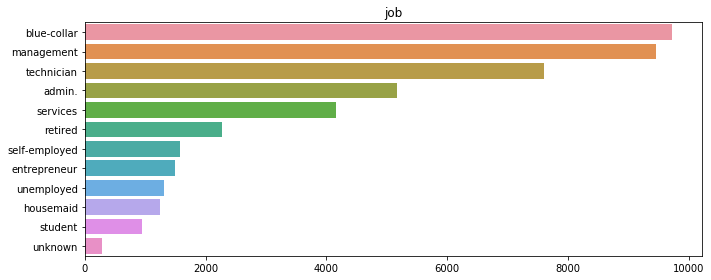

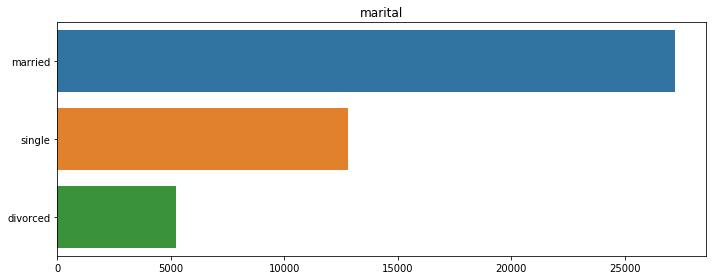

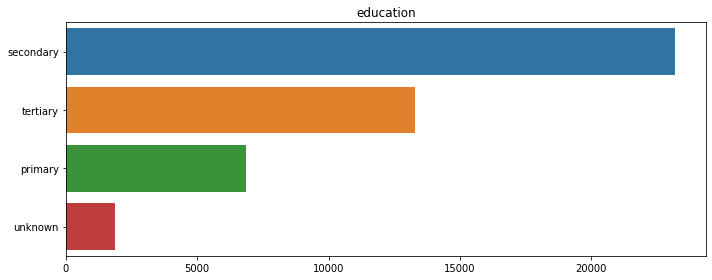

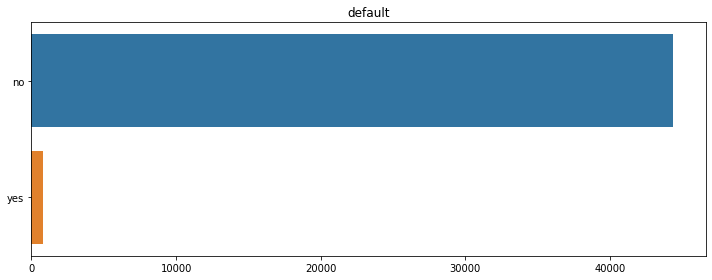

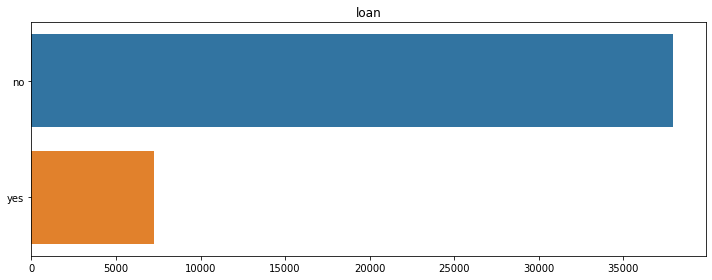

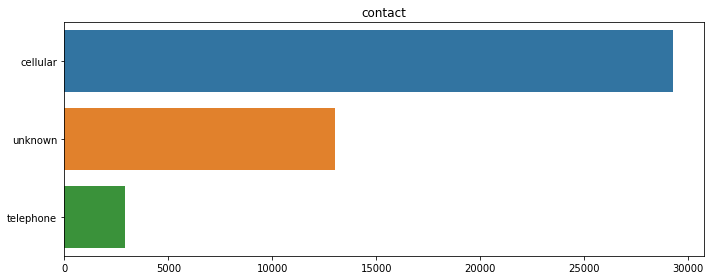

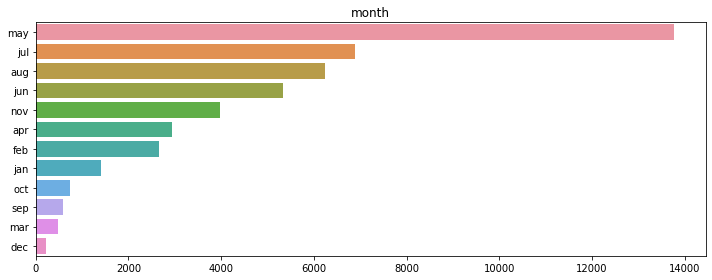

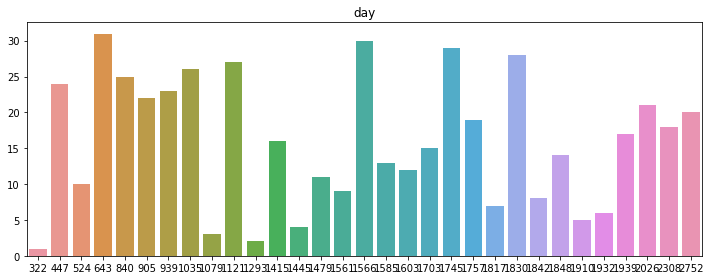

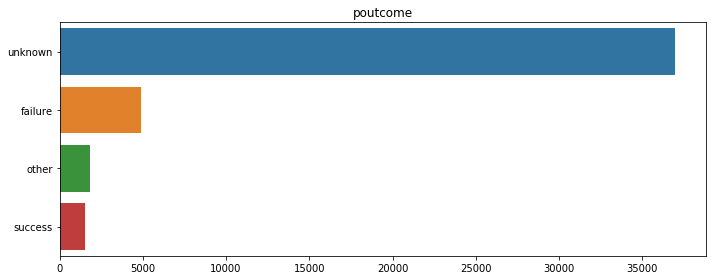

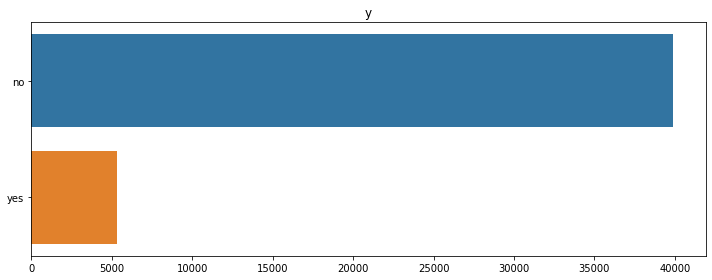

In [18]:
# Visualize useful information
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [19]:
# Convert Categorical values in numeric

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
cat_data = data.select_dtypes(include=['object'])

In [22]:
label_encoder=[]
for col in cat_data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(cat_data[col])

In [23]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43221,26,8,2,2,0,294,0,0,0,5,7,87,1,91,2,2,1
27029,32,7,0,1,0,5267,1,0,0,21,9,183,1,168,2,0,0
37054,49,1,2,1,0,725,1,0,0,13,8,29,6,348,4,1,0
1578,41,1,1,0,0,-52,1,0,2,8,8,120,5,-1,0,3,0
41871,33,11,2,1,0,9,0,0,0,19,10,238,1,-1,0,3,0
37396,37,7,2,2,0,72,1,0,0,13,8,98,2,370,1,0,0
4536,33,4,2,0,0,4897,1,0,2,20,8,151,1,-1,0,3,0
41179,81,5,1,1,0,1,0,0,0,19,1,65,5,-1,0,3,0
23176,31,4,2,2,0,730,0,0,0,27,1,108,6,-1,0,3,0
27415,30,0,2,1,0,294,1,1,0,21,9,527,1,-1,0,3,0


In [24]:
data.shape

(45211, 17)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
y            45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [26]:
# feature_data and target data
feature = data.drop(columns=['y'])
target = data.y

In [27]:
#Split the data
from sklearn.model_selection import train_test_split

In [28]:
trainX, testX, trainY, testY = train_test_split(feature,target)

#Use Wrapper Methods for feature Selection
* Using iterative process, we will try to figure out best subset of feature for ML algorithm giving best accuracy.

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [31]:
for k in range(4,10):
    sfs = SequentialFeatureSelector(k_features=k, estimator=DecisionTreeClassifier())
    sfs.fit(trainX,trainY)
    print(k,sfs.k_score_,sfs.k_feature_names_)

4 0.8927391969104089 ('default', 'contact', 'campaign', 'poutcome')
5 0.8925032739534384 ('default', 'loan', 'contact', 'campaign', 'poutcome')
6 0.8921198322841708 ('default', 'housing', 'loan', 'contact', 'campaign', 'poutcome')
7 0.8905863091449643 ('marital', 'default', 'housing', 'loan', 'contact', 'campaign', 'poutcome')
8 0.8880795130251661 ('marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'poutcome')
9 0.8841276414997392 ('marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome')


In [34]:
#Build the model
dt = DecisionTreeClassifier()

In [35]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [36]:
dt.score(testX,testY)

0.8767583827302486